Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [2]:
library('tidymodels')



Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching packages ────────────────────────────────────── tidymodels 1.4.1 ──

✔ broom        1.0.9     ✔ recipes      1.3.1
✔ dials        1.4.2     ✔ rsample      1.3.1
✔ dplyr        1.1.4     ✔ tailor       0.1.0
✔ ggplot2      3.5.2     ✔ tidyr        1.3.1
✔ infer        1.0.9     ✔ tune         2.0.0
✔ modeldata    1.5.1     ✔ workflows    1.3.0
✔ parsnip      1.3.3     ✔ workflowsets 1.1.1
✔ purrr        1.1.0     ✔ yardstick    1.3.2

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [3]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [4]:
glimpse(diabetes_train)



Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 1, 4, 1, 3, 8, 1, 13, 5, 10, 7, 7, 7, 2, 7…
$ Glucose                  <dbl> 85, 89, 110, 103, 126, 99, 97, 145, 117, 122,…
$ BloodPressure            <dbl> 66, 66, 92, 30, 88, 84, 66, 82, 92, 78, 84, 9…
$ SkinThickness            <dbl> 29, 23, 0, 38, 41, 0, 15, 19, 0, 31, 0, 18, 0…
$ Insulin                  <dbl> 0, 94, 0, 83, 235, 0, 140, 110, 0, 0, 0, 0, 0…
$ BMI                      <dbl> 26.6, 28.1, 37.6, 43.3, 39.3, 35.4, 23.2, 22.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.167, 0.191, 0.183, 0.704, 0.388, 0.4…
$ Age                      <dbl> 31, 21, 30, 33, 27, 50, 22, 57, 38, 45, 37, 4…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

I think glucose is suitable as the "outcome" in a logistic regression model because it represents the probability of someone having diabetes. It also represents it by having the outcome variable be either 0 or 1.

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     |             |
| BMI         |             |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

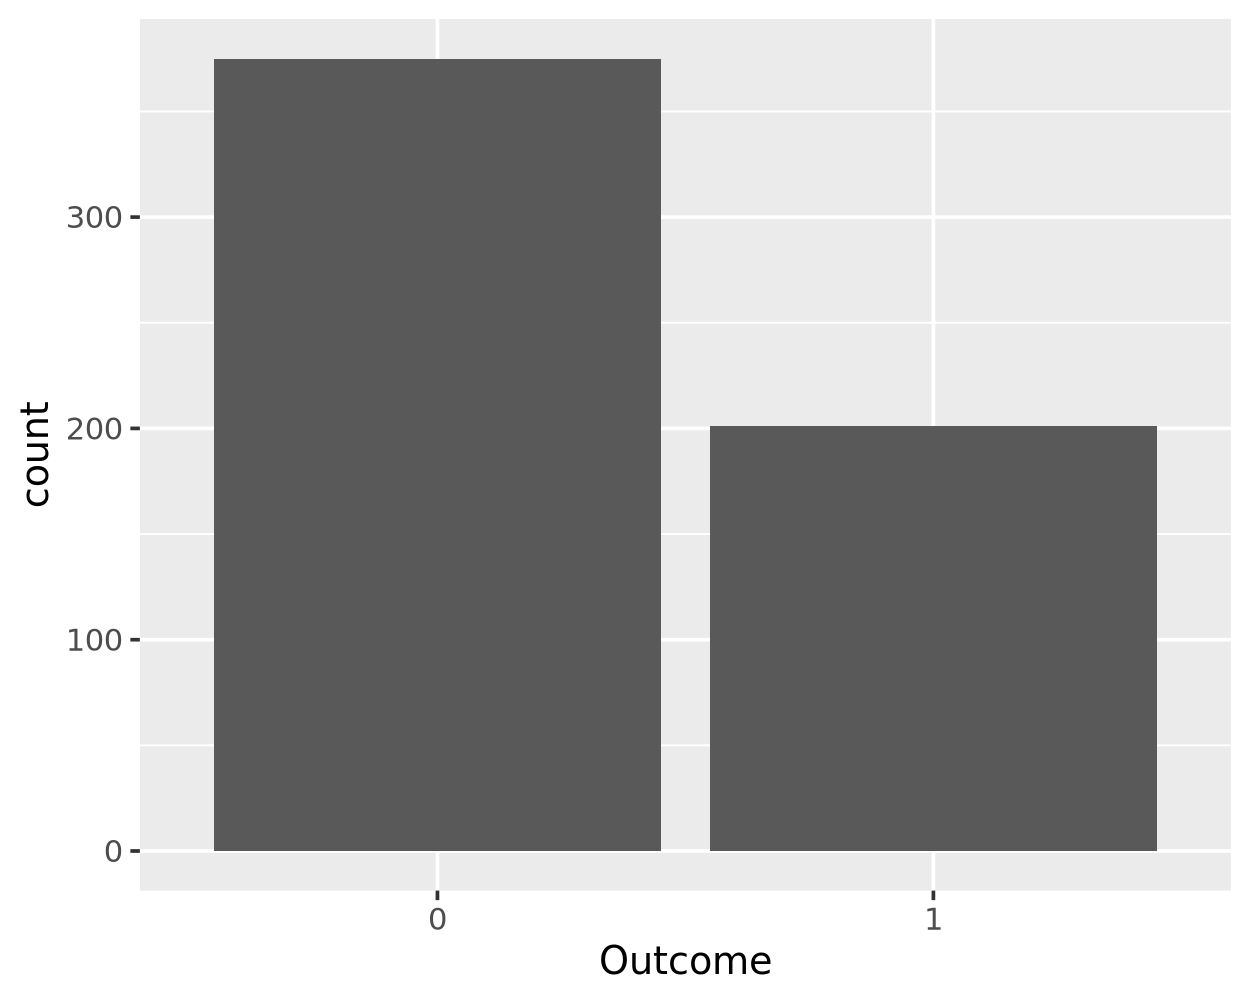

In [11]:
ggplot(data = diabetes_train, mapping = aes(x = Outcome)) +
  geom_bar()

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

I don't think we have equal counts of each outcome because it looks like there are more 0's than 1's, meaning less people have diabetes.



Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [16]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,89.0
0,BMI,28.1
0,Glucose,110.0
0,BMI,37.6


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

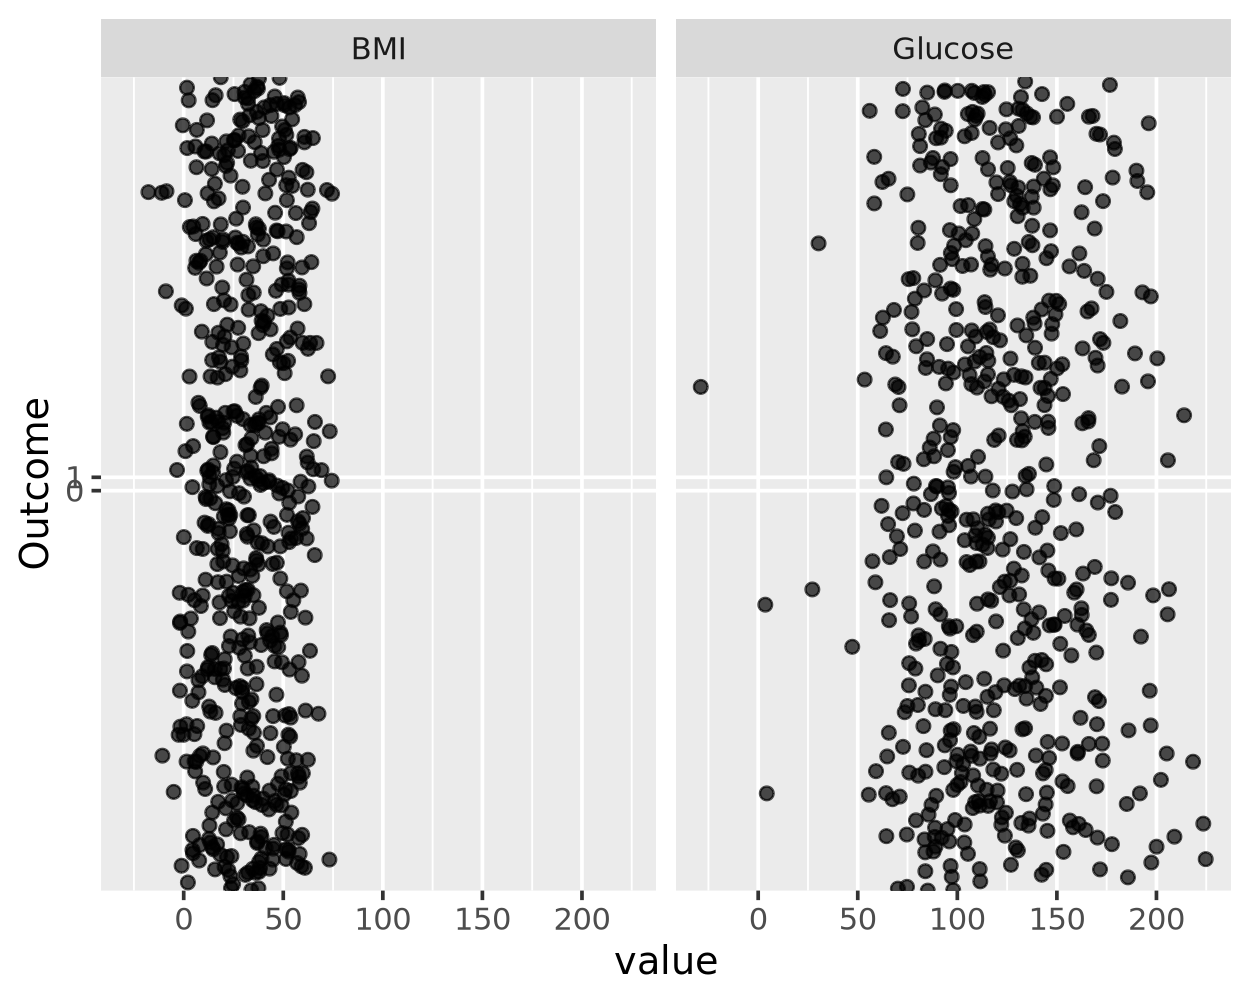

In [27]:
ggplot(data = plot_df, mapping = aes(x = value, y = Outcome)) + 
  geom_jitter(width = 30, height = 30, alpha = 0.7) +
  facet_wrap(~name)



❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

Both charts get narrower.

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [30]:
mod = logistic_reg() |> set_engine('glm')

mod
mod_fit = mod |> fit(Outcome ~ BMI + Glucose, data = diabetes_train)
mod_fit


Logistic Regression Model Specification (classification)

Computational engine: glm 


parsnip model object


Call:  stats::glm(formula = Outcome ~ BMI + Glucose, family = stats::binomial, 
    data = data)

Coefficients:
(Intercept)          BMI      Glucose  
   -7.47226      0.08925      0.03178  

Degrees of Freedom: 575 Total (i.e. Null);  573 Residual
Null Deviance:	    745.1 
Residual Deviance: 587 	AIC: 593

Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [31]:
diabetes_test_wPred <- augment(mod_fit, diabetes_test)



Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [32]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 112  26
         1  13  41

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**

67 individuals had diabetes. Out of the 67 people who had diabetes, 41 were predicted to have diabetes and ended up having it. 13 people were predicted to have diabetes, but ended up not having it.

